In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Analyzing the Dataset and search for NULL&naVALUES 
# consulter les types des columns & shape du df

In [5]:
def check_df(dataframe, head=5):
    print("************************ Shape ***********************")
    print(dataframe.shape)

    print("************************ Types ***********************")
    print(dataframe.dtypes)

    print("************************ NULL ***********************")
    print(dataframe.isnull().any())
    print("*********************** NA ************************")
    print(dataframe.isna().any())

In [6]:
check_df(df)

************************ Shape ***********************
(205, 26)
************************ Types ***********************
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object
************************ NULL ***********************
car_ID              False
symboling           False
CarName             False
fuelty

In [7]:
# Drop car Id
df=df.drop(['car_ID'],axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


(205, 25)

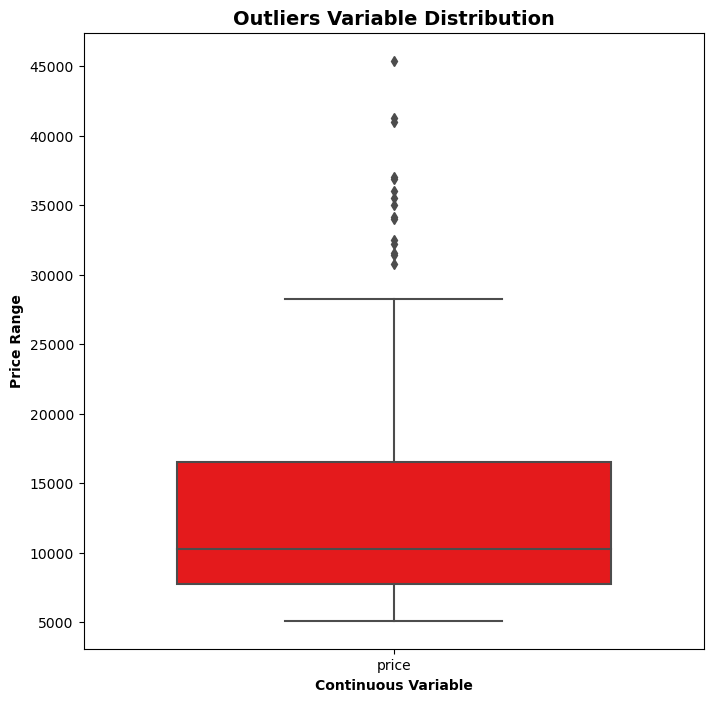

In [8]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

In [9]:
# Extracting car company from car name
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# Handling duplicate values in car name

In [11]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [12]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
df['symboling']=df['symboling'].astype('str')

In [14]:
# Segregation of Numerical and Categorical Variables/Columns
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [15]:
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [16]:
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Visualisation of different car names

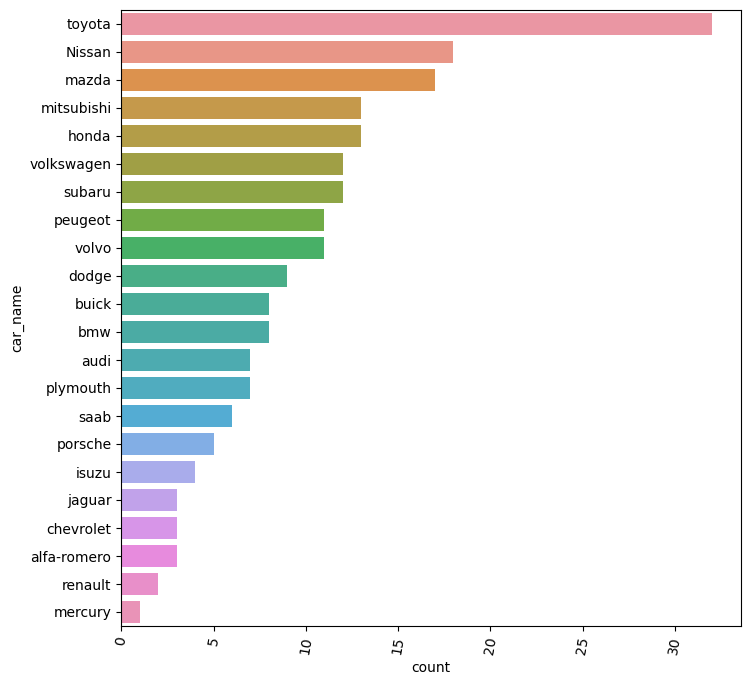

In [17]:
df_v=pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})
plot = sns.barplot(y='car_name',x='count',data=df_v)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

# Visualizing the distribution of car prices

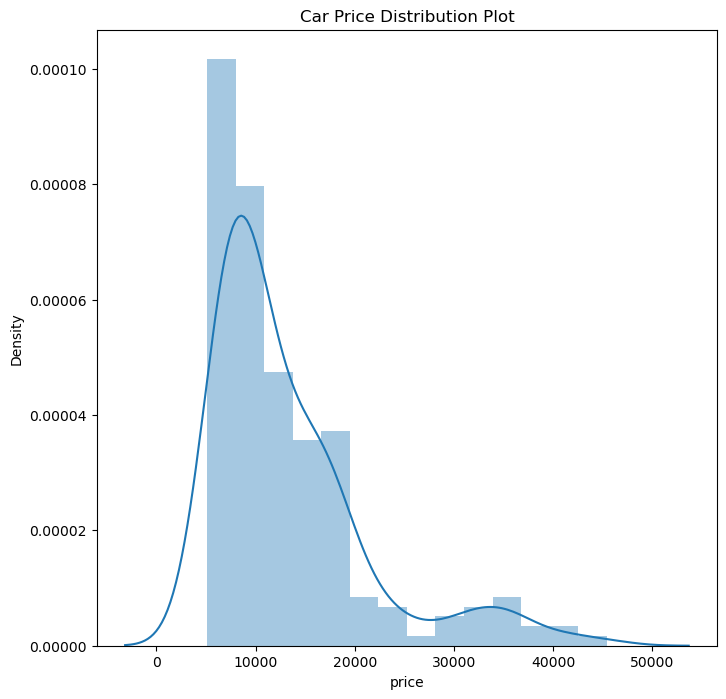

In [18]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price']);

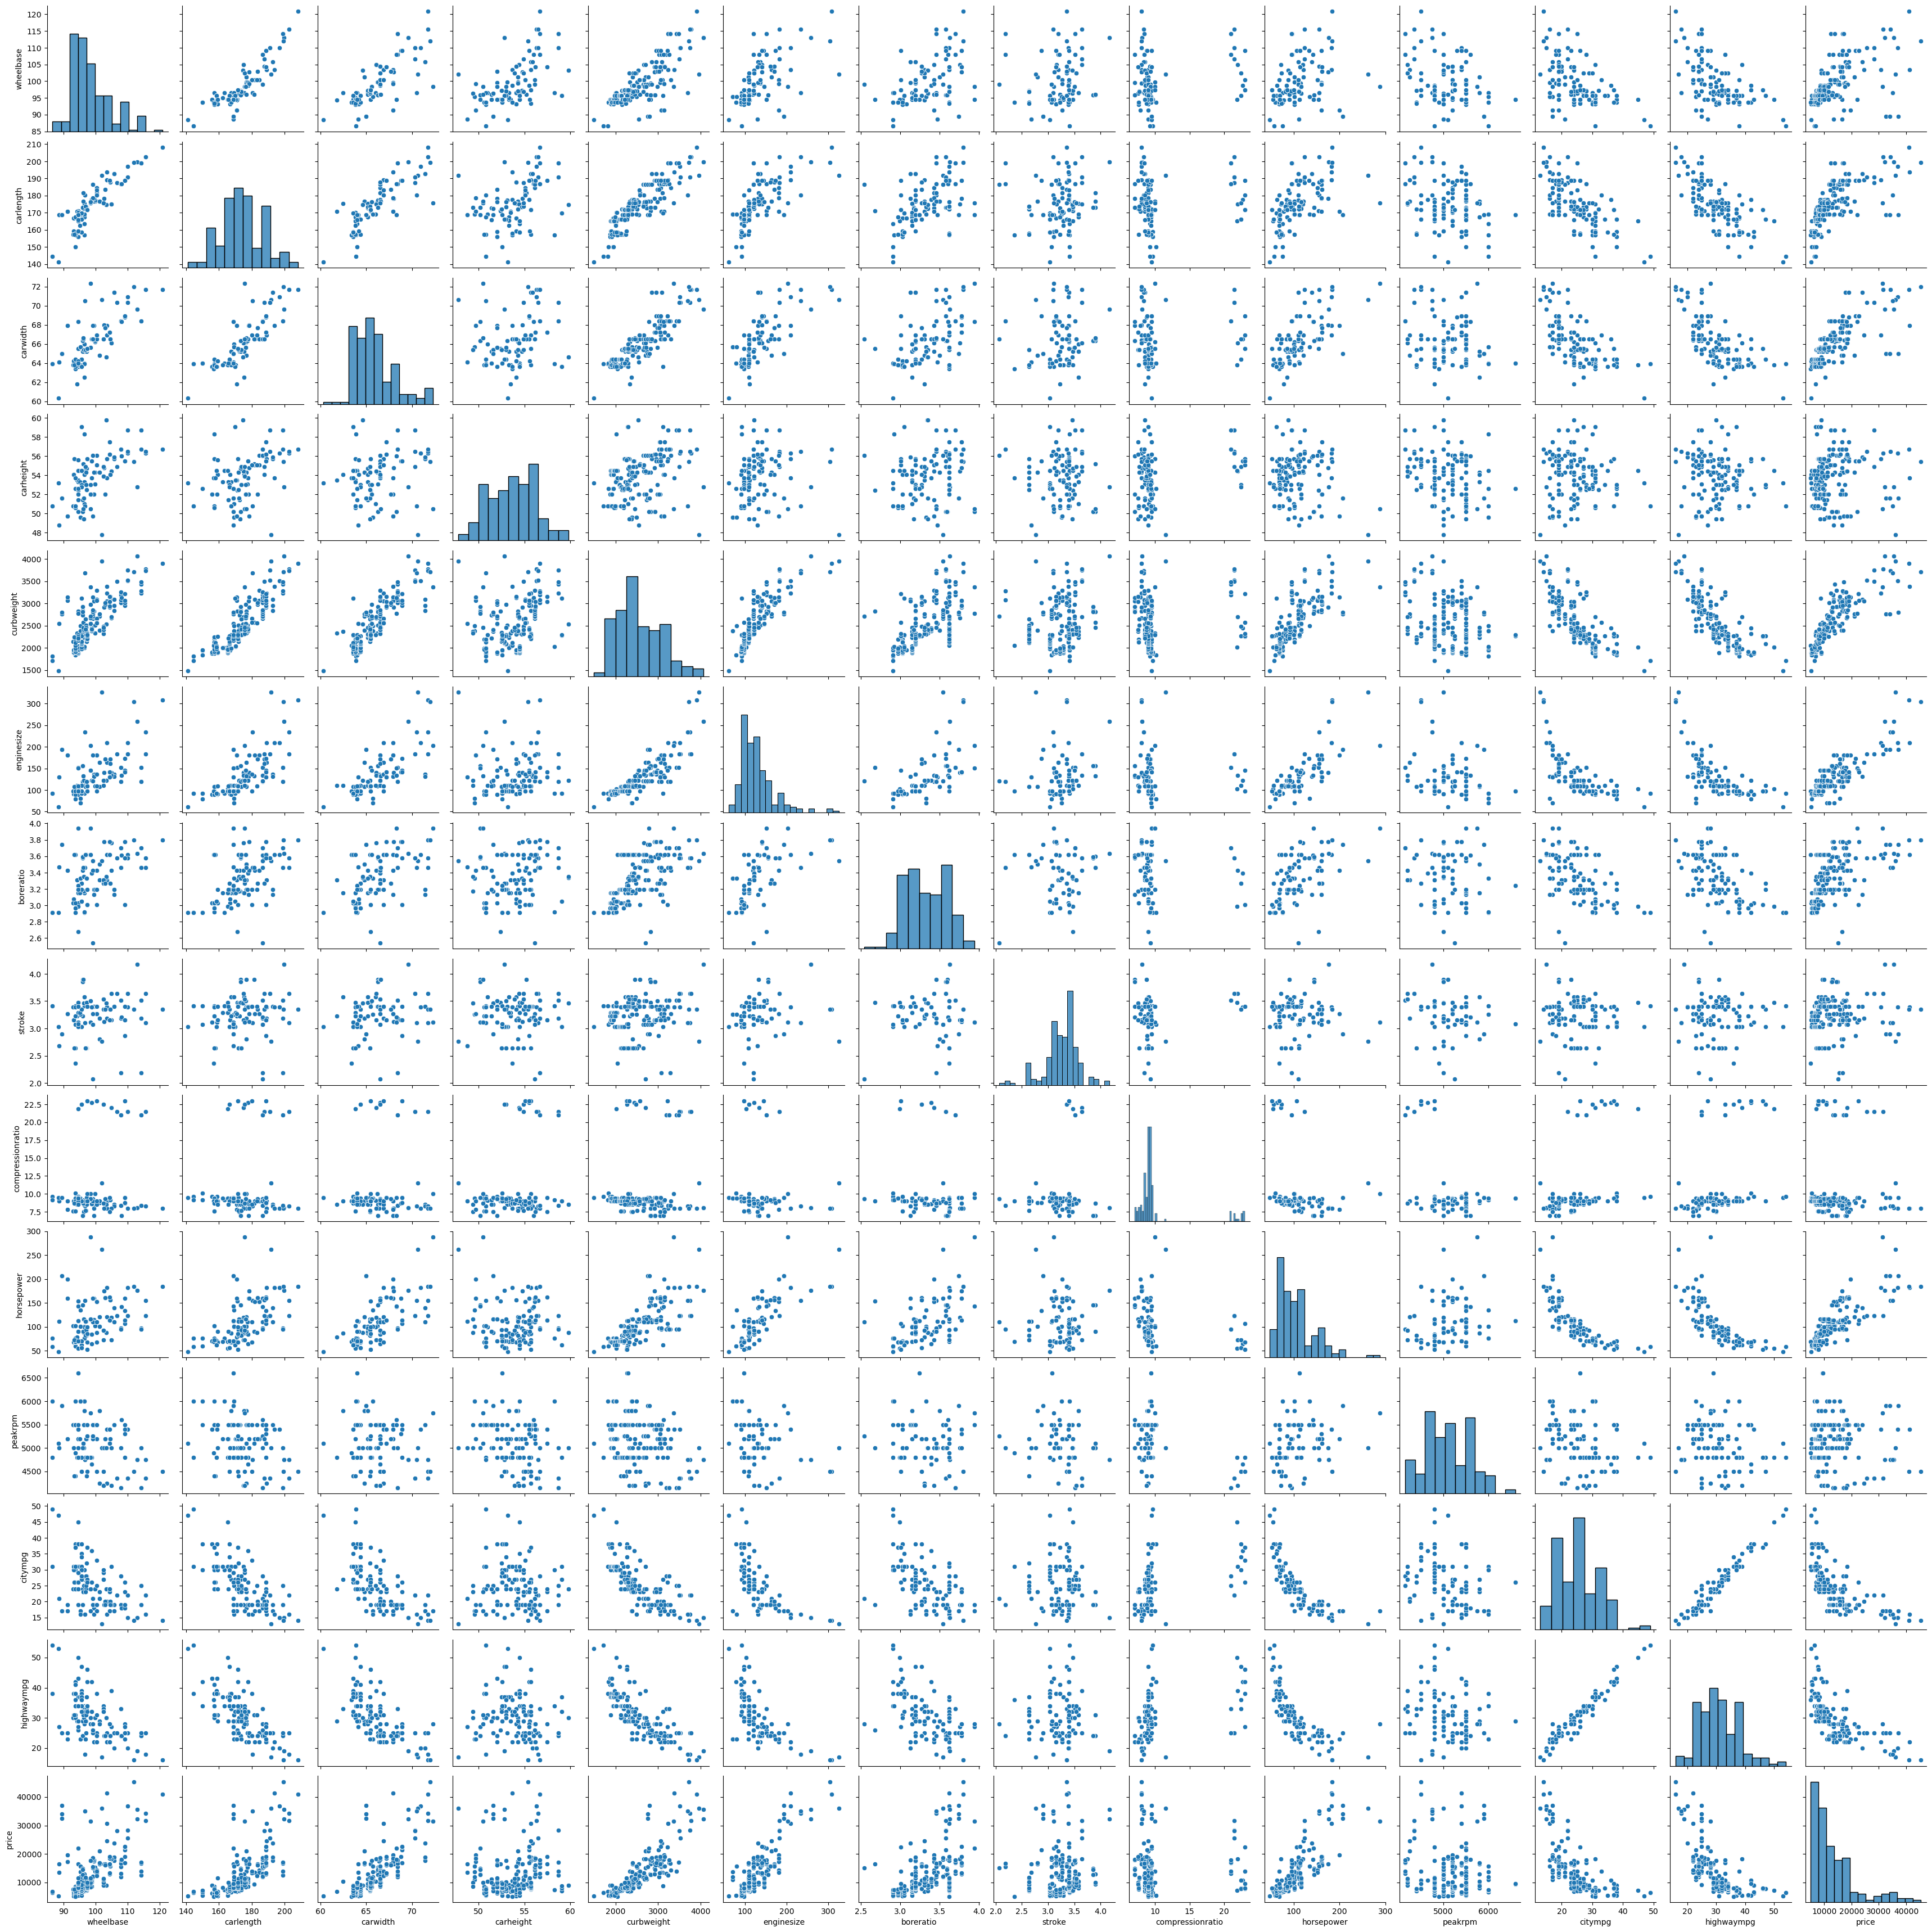

In [19]:
ax = sns.pairplot(df[num_col])

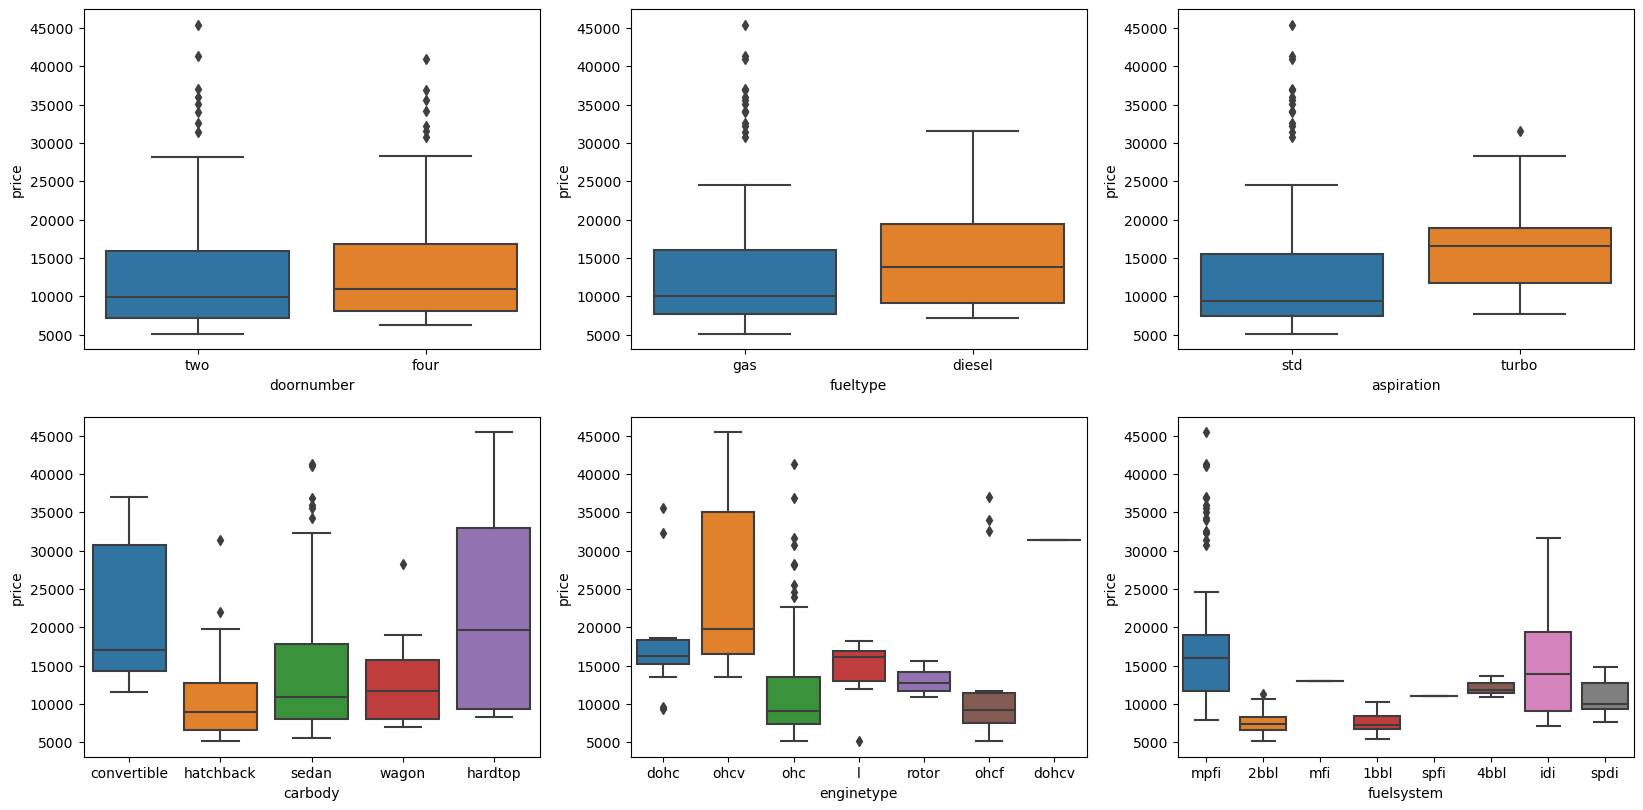

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

In [21]:
#Diesel cars are more expensive than petrol cars.
#All the types of car bodies are relatively cheaper as compared to convertible car bodies.
#Cars with rear engine locations are way more expensive than cars with front engine locations.
#The price of the car is directly proportional to the number of cylinders in most cases.
#DoorNumber isn't affecting the price much.

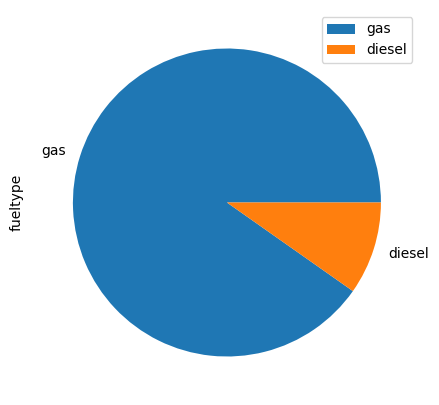

In [22]:
df_v=pd.DataFrame(df['fueltype'].value_counts())
plot = df_v.plot.pie(y='fueltype', figsize=(5, 5))

# Price distribution of diesel vs gas car

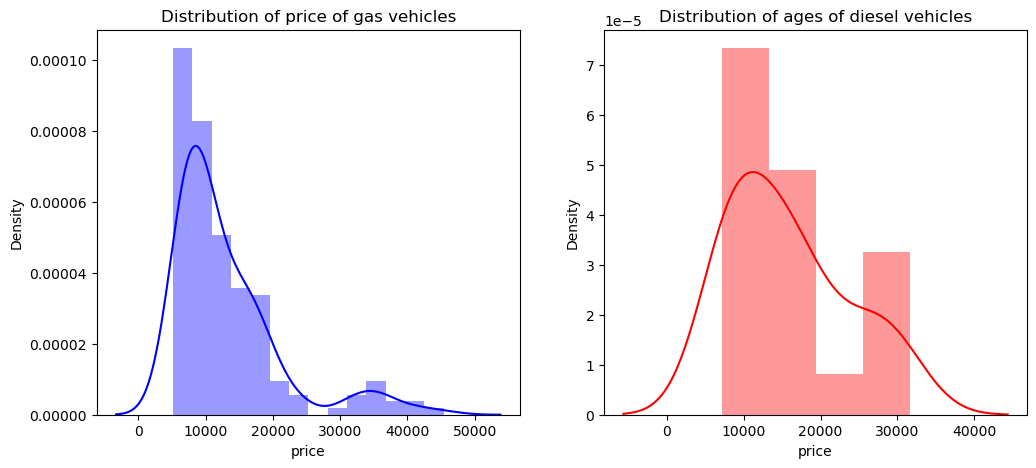

In [23]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles');

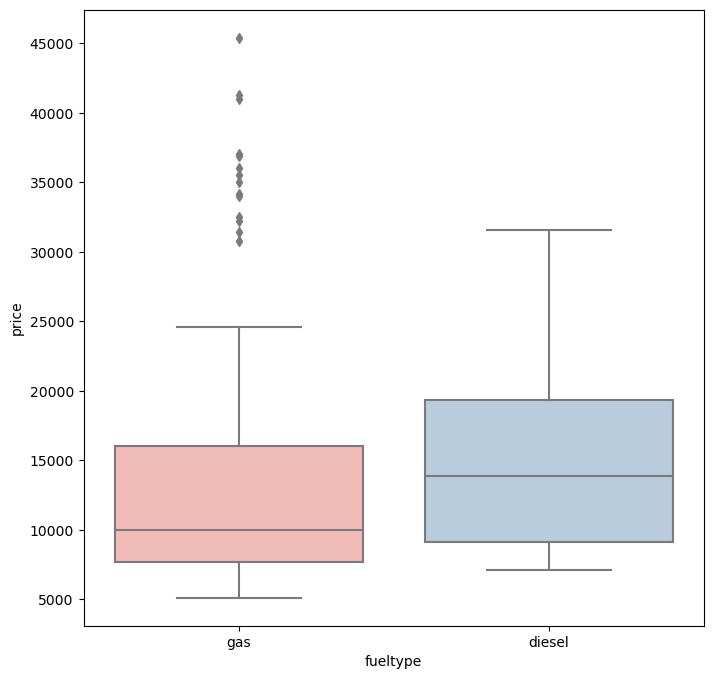

In [24]:
sns.boxplot(x = 'fueltype', y = 'price', data = df,palette='Pastel1');


In [25]:
df[num_col].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


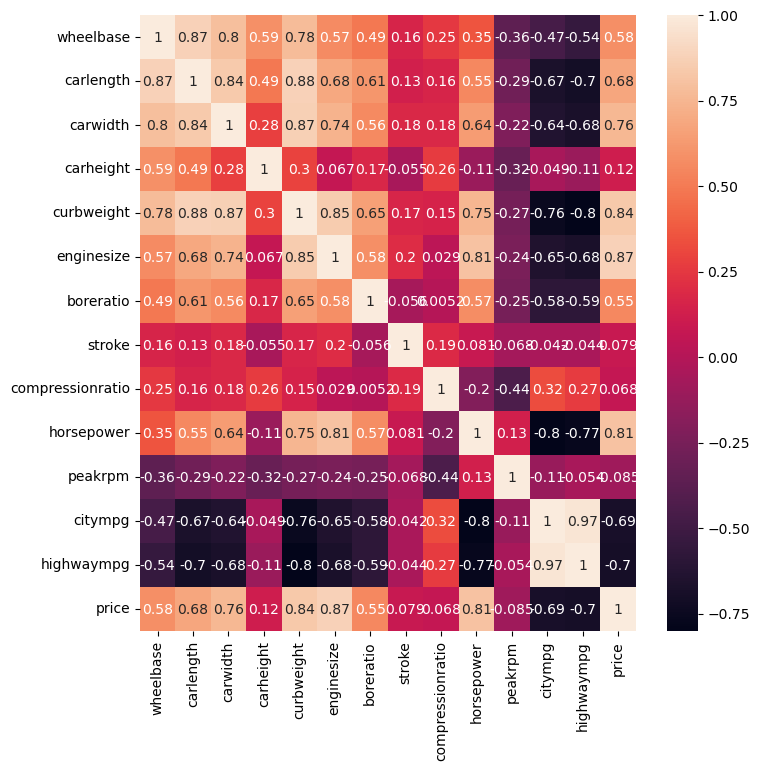

In [26]:
sns.heatmap(df[num_col].corr(),annot = True);

In [27]:
#wheelbase has high positive correlation with carlength,carwidth and curbweight
#carlength has high postive correlation with curbweight
#carlength has negative correlation with highwaympg
#carwidth has high postive correlation with curbweight and engine size
#enginesize has high positive correlation with horsepower
#curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
#horsepower has negative correlation with citympg and highwaympg
#citympg and highwaympg are highly correlated

# Scatter plot of wheelbase , carlength,carheight and carweight with price

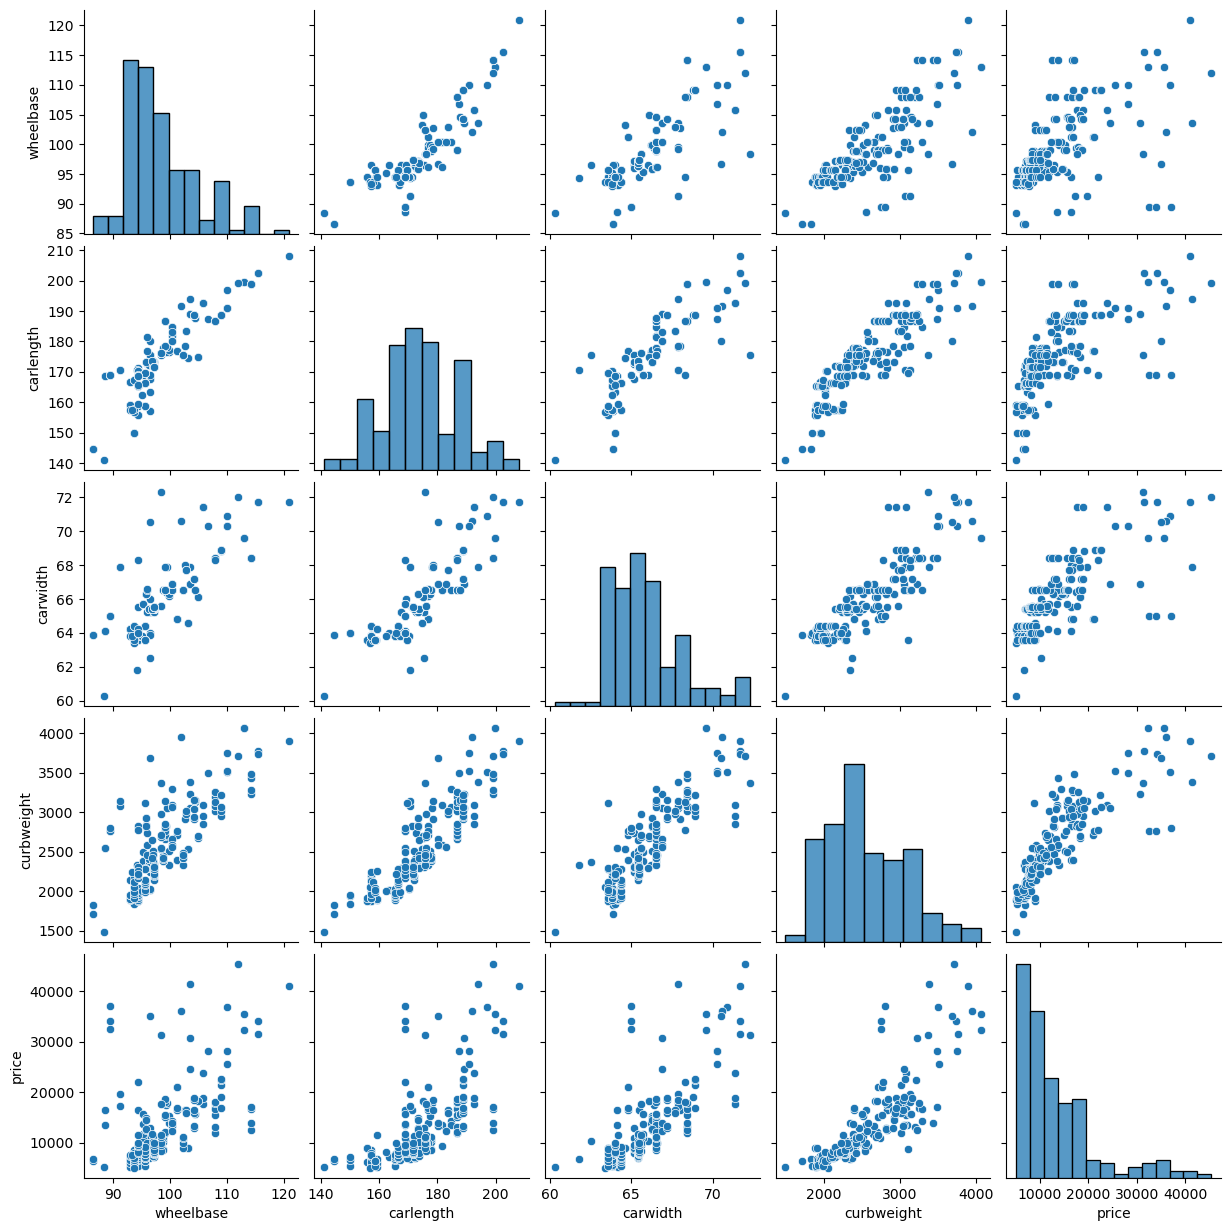

In [28]:
col=['wheelbase','carlength','carwidth','curbweight','price']
sns.pairplot(df[col])

<AxesSubplot:>

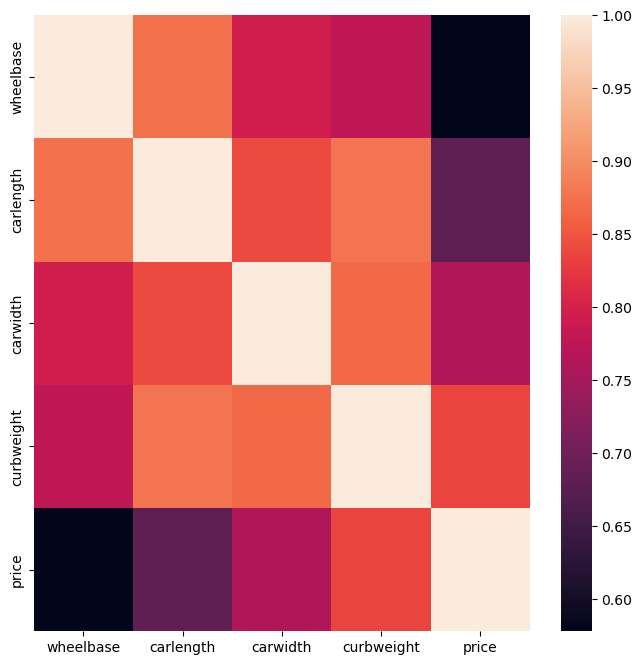

In [29]:
sns.heatmap(df[col].corr())

# Feature Selection

In [30]:
from sklearn import preprocessing
X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)# La colonne "price" est utilisée comme étiquette cible
y=df['price']

In [31]:
# Create the RFE object and rank each pixel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [32]:
features=list(X.columns[rfe.support_])
X = X[features]
y = df.price

In [33]:
# Séparer les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)  # 80%

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lreg =  LinearRegression()
lreg.fit(X_train,y_train)
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)
lreg.score(X_test,y_test)

0.716395844416087

# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)
dt_regressor.score(X_test,y_test)

0.8629967876846585

# Random Forest regressor

In [36]:
from sklearn.metrics import r2_score

Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)


r2_score(y_test,Rf_test_pred)

0.9082091257625995

In [37]:
#Conclusion
#We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
#As we can see random forest performing best (with accuracy ~ 0.90)